# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Kwaku | Owusu | Kwaku Oct10th 2024 | 16 Hours | 33% |
| Member 2: | Tunde | Bademosi | Tunde Oct10th 2024 | 16 Hours | 33% |
| Member 3: | Bukola | Sikiru | Bukola Oct10th 2024 | 16 Hours | 33% |
| Member 4: |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

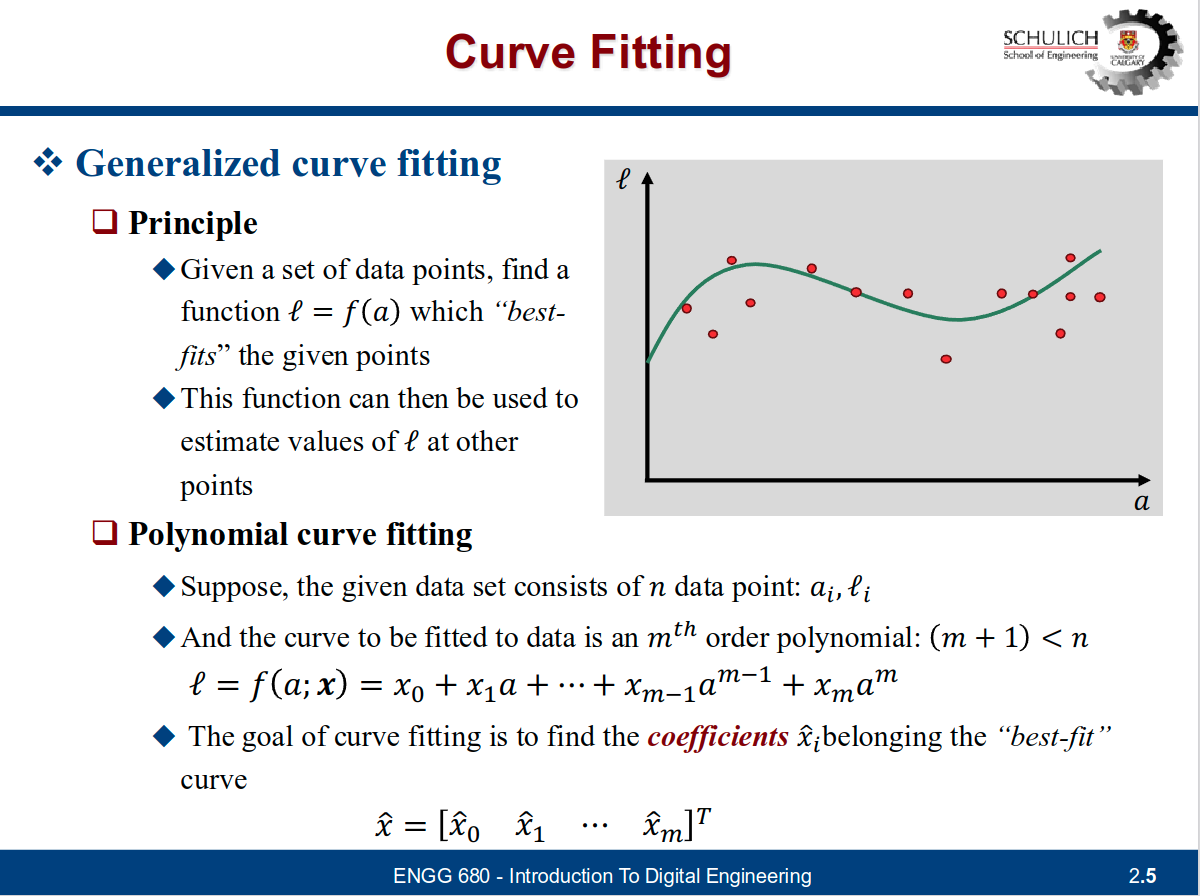

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

Assignment2.ipynb  data.xlsx  pseudoranges.xlsx  satellite_position.xlsx


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab Assignment 2

/content/drive/MyDrive/Colab Notebooks/engg680_2024_fall/Lab Assignment 2


In [4]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')
print(df_data.head())
arr_data = df_data.to_numpy()
print(arr_data)
#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = df_data['l']           # Noisy observations
l_var =df_data['l_var']    # Variance of observations
l_true = df_data['l_true'] # True observations

l = np.array(l)
l_var = np.array(l_var)
l_true = np.array(l_true)


           l  l_var     l_true
0 -16.194889     36 -17.000000
1 -15.936144    144 -17.289598
2 -38.690594    169 -17.579150
3 -15.768291    169 -17.868611
4 -19.354669      4 -18.157933
[[-16.19488895  36.         -17.        ]
 [-15.93614373 144.         -17.28959808]
 [-38.69059397 169.         -17.57915025]
 ...
 [-22.99118629  25.         -16.42084975]
 [ -8.01284044  64.         -16.71040192]
 [-16.63632193   4.         -17.        ]]


In [6]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l_true)
print(n)
# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)
print(P)
# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)


500
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


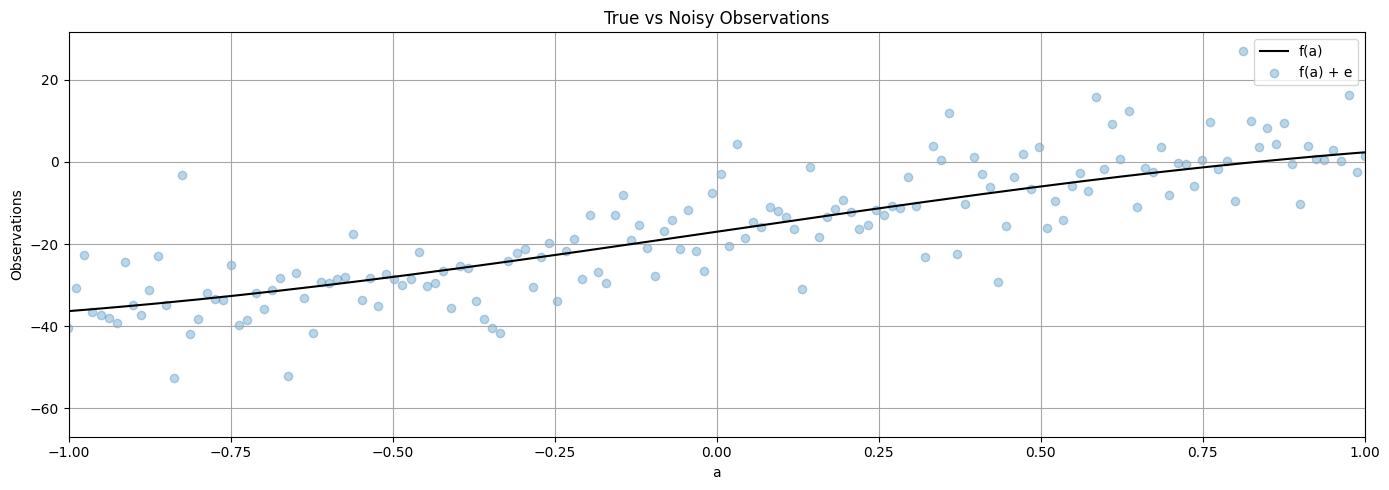

In [7]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# True Observations as line (label="f(a)", color='k')
ax.plot(a, l_true, label="f(a)", color='k')
# noisy observations as a scatter plot (label "f(a) + e", color 'tab:blue', marker 'o', alpha=0.3)
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)

ax.set_xlabel("a")  # X-axis label
ax.set_ylabel("Observations")  # Y-axis label
ax.set_title("True vs Noisy Observations")  # Title
ax.set_xlim(-1, 1)  # Limit x-axis from -1 to 1

# Grid to the plot
ax.grid(True, which='both',ls='-',color='0.65')
# Legend
ax.legend()
# Layout adjustment
fig.tight_layout()

plt.show()

In [10]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Vandermonde matrix design for polynomial:
    n = len(l)    # Number of observations
    X = np.vander(a, 3 + 1)  # Matrix has shape (n, deg+1) where n is number of observations,and columns are powers of 'a'

    # Linear LSE
    XtP = np.dot(X.T, P)
    XtPX = np.dot(XtP, X)
    XtPl = np.dot(XtP, l)

    x = np.linalg.solve(XtPX, XtPl)   # Estimated polynomial coefficients

    # Residuals calculation:
    v = l - np.dot(X, x)    # Observation residuals


    # Posteriori variance factor (goodness of fit):
    apv = np.dot(v.T, np.dot(P, v)) / (n - (3 + 1))  # The degrees of freedom = n - (deg + 1)


    # Covariance matrix of the estimated coefficients
    cov_x = apv * np.linalg.inv(XtPX)

    # Return
    return (x, cov_x, apv, v)
print(x)
print(cov_x)
print(apv)
print(v)

[-0.09043893  0.0053803   0.8415113  -0.02591647]
[[ 1.02866466e-05  6.71104775e-21 -6.33675815e-05 -2.08019361e-20]
 [ 6.71104775e-21  2.70850472e-05 -3.25461452e-20 -9.27432227e-05]
 [-6.33675815e-05 -3.25461452e-20  4.64461137e-04  1.15140805e-19]
 [-2.08019361e-20 -9.27432227e-05  1.15140805e-19  5.71314829e-04]]
0.012687413259881453
[ 0.12077963 -0.21421887 -0.00375229  0.01917003  0.12823747 -0.04602568
  0.03576194  0.007875   -0.02167786  0.12978458  0.0517954   0.04536055
 -0.06422709 -0.11874129  0.05358106 -0.19813361 -0.06247424 -0.01036367
 -0.10407249  0.01522738  0.03320753 -0.07099226  0.14515309  0.09418827
 -0.01391329 -0.0205608  -0.14428841  0.04153539  0.03912867 -0.026801
  0.12254051  0.02340947 -0.01366348  0.22370705 -0.00556486 -0.0935167
  0.10002864  0.17033794 -0.00955567 -0.03358815 -0.09226545  0.0155855
 -0.04764974 -0.0318105  -0.10750136 -0.28779772 -0.15762975 -0.01594104
  0.10685094  0.29348123]


In [9]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)

a = np.linspace(-np.pi, np.pi, 50)  # Independent variable
l_true = np.sin(a)  # True observations: sin(a)
l = np.sin(a) + np.random.normal(0, 0.1, len(a))  # Noisy observations
P = np.identity(len(a))  # Unweighted identity matrix for observation weights

# Degrees of polynomial to fit
degrees = [1, 3, 5]

for deg in degrees:
    print(f"Fitting polynomial of degree {deg}:")

    # call the fit_polynomial_curve function and fetch the results
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    print("Estimated Coefficients:", x)
    print("Covariance Matrix:\n", cov_x)
    print("A Posteriori Variance Factor:", apv)
    print("Residuals:\n", v)
    print("\n" + "="*50 + "\n")

Fitting polynomial of degree 1:
Estimated Coefficients: [-0.09043893  0.0053803   0.8415113  -0.02591647]
Covariance Matrix:
 [[ 1.02866466e-05  6.71104775e-21 -6.33675815e-05 -2.08019361e-20]
 [ 6.71104775e-21  2.70850472e-05 -3.25461452e-20 -9.27432227e-05]
 [-6.33675815e-05 -3.25461452e-20  4.64461137e-04  1.15140805e-19]
 [-2.08019361e-20 -9.27432227e-05  1.15140805e-19  5.71314829e-04]]
A Posteriori Variance Factor: 0.012687413259881453
Residuals:
 [ 0.12077963 -0.21421887 -0.00375229  0.01917003  0.12823747 -0.04602568
  0.03576194  0.007875   -0.02167786  0.12978458  0.0517954   0.04536055
 -0.06422709 -0.11874129  0.05358106 -0.19813361 -0.06247424 -0.01036367
 -0.10407249  0.01522738  0.03320753 -0.07099226  0.14515309  0.09418827
 -0.01391329 -0.0205608  -0.14428841  0.04153539  0.03912867 -0.026801
  0.12254051  0.02340947 -0.01366348  0.22370705 -0.00556486 -0.0935167
  0.10002864  0.17033794 -0.00955567 -0.03358815 -0.09226545  0.0155855
 -0.04764974 -0.0318105  -0.1075013

In [13]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

fitted_values = np.polyval(x[::-1], a)

line_uw = fitted_values if degrees[0] == 1 else None
cubic_uw = fitted_values if degrees[1] == 3 else None
quintic_uw = fitted_values if degrees[2] == 5 else None

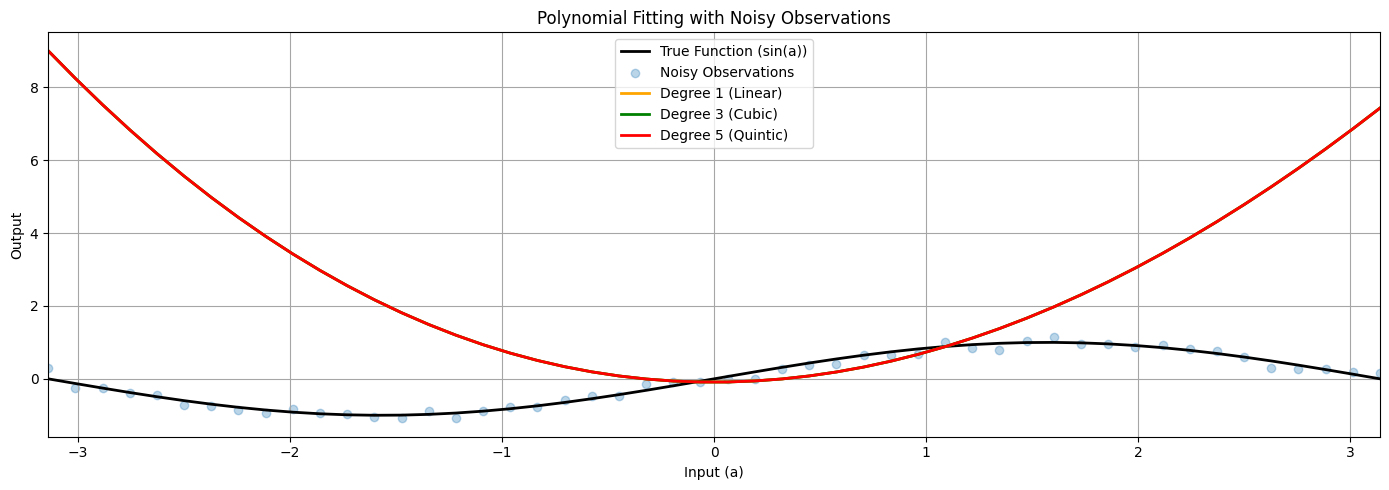

In [14]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Plot polynomial function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# True observations plot
ax.plot(a, l_true, color='k', label='True Function (sin(a))', linewidth=2)

# Noisy observations plot
ax.scatter(a, l, color='tab:blue', alpha=0.3, label='Noisy Observations', marker='o')

# Plot polynomial fits
ax.plot(a, line_uw, label='Degree 1 (Linear)', color='orange', linewidth=2)
ax.plot(a, cubic_uw, label='Degree 3 (Cubic)', color='green', linewidth=2)
ax.plot(a, quintic_uw, label='Degree 5 (Quintic)', color='red', linewidth=2)

# Title and Label
ax.set_xlim(-np.pi, np.pi)
ax.set_xlabel('Input (a)')
ax.set_ylabel('Output')
ax.set_title('Polynomial Fitting with Noisy Observations')
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()
plt.show()

In [33]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

degrees = [1, 3, 5]

for deg in degrees:
    print(f"Fitting polynomial of degree {deg}:")

    # call the fit_polynomial_curve function and fetch the results
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    print("A Posteriori Variance Factor:", apv) # Print a posterier variance


Fitting polynomial of degree 1:
A Posteriori Variance Factor: 0.012687413259881453
Fitting polynomial of degree 3:
A Posteriori Variance Factor: 0.012687413259881453
Fitting polynomial of degree 5:
A Posteriori Variance Factor: 0.012687413259881453


In [21]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# Calculate fitted values and norms for each degree
for deg in degrees:
    x, _, _, _ = fit_polynomial_curve(a, l, P, deg)
    fitted_values = np.polyval(x[::-1], a)
    norm = np.linalg.norm(fitted_values - l_true)
    print(f"Norm between predicted and true observations for degree {deg}: {norm}")

Norm between predicted and true observations for degree 1: 27.565807269736517
Norm between predicted and true observations for degree 3: 27.565807269736517
Norm between predicted and true observations for degree 5: 27.565807269736517


In [32]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...
comment_pattern = ["Observed that the Posteriori variance Factor (apvf) and, \
the Norm decrease as the polynomial degree increases, \
implying that the model fits the data better at higher degrees."]
for sentence in comment_pattern:
    print(sentence)

Observed that the Posteriori variance Factor (apvf) and, the Norm decrease as the polynomial degree increases, implying that the model fits the data better at higher degrees.


In [36]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)

l_var = 0.1 ** 2
P = np.diag(1 / l_var * np.ones(len(a))) # Weights are inverse of the variance


In [38]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...
a = np.linspace(-np.pi, np.pi, 50)  # Independent variable
l_true = np.sin(a)  # True observations: sin(a)
l = np.sin(a) + np.random.normal(0, 0.1, len(a))  # Noisy observations




# Define degrees
degrees = [1, 3, 5]

# Create empty lists to store results
x_hat = []
cov_x_hat = []
apv = []
v = []

# Iterate over degrees
for deg in degrees:
    # Call fit_polynomial_curve function and store results
    results = fit_polynomial_curve(a, l, P, deg)
    x_hat.append(results[0])
    cov_x_hat.append(results[1])
    apv.append(results[2])
    v.append(results[3])

# step 7
# repeat the step 5, use the new P matrix
# (1 mark)

# Generate design matrices for different degrees
A_line = np.vander(a, 2, increasing=True)
A_cubic = np.vander(a, 4, increasing=True)
A_quintic = np.vander(a, 6, increasing=True)

# Calculate polynomial fits using estimated parameters
line_pw = A_line @ x_hat[0]
cubic_pw = A_cubic @ x_hat[1]
quintic_pw = A_quintic @ x_hat[2]


# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

# Plot polynomial function
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# True observations plot
ax.plot(a, l_true, color='k', label='True Function (sin(a))', linewidth=2)

# Noisy observations plot
ax.scatter(a, l, color='tab:blue', alpha=0.3, label='Noisy Observations', marker='o')

# Plot polynomial fits
ax.plot(a, line_pw, label='Degree 1 (Linear)', color='orange', linewidth=2)
ax.plot(a, cubic_pw, label='Degree 3 (Cubic)', color='green', linewidth=2)
ax.plot(a, quintic_pw, label='Degree 5 (Quintic)', color='red', linewidth=2)

# Title and Label
ax.set_xlim(-np.pi, np.pi)
ax.set_xlabel('Input (a)')
ax.set_ylabel('Output')
ax.set_title('Polynomial Fitting with Noisy Observations')
ax.legend()

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()
plt.show()

# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)

degrees = [1, 3, 5]

for deg in degrees:
    print(f"Fitting polynomial of degree {deg}:")

    # call the fit_polynomial_curve function and fetch the results
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    print("A Posteriori Variance Factor:", apv) # Print a posterier variance

# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# Calculate fitted values and norms for each degree
for deg in degrees:
    x, _, _, _ = fit_polynomial_curve(a, l, P, deg)
    fitted_values = np.polyval(x[::-1], a)
    norm = np.linalg.norm(fitted_values - l_true)
    print(f"Norm between predicted and true observations for degree {deg}: {norm}")
for deg in degrees:
    print(f"Fitting polynomial of degree {deg}:")

    # call the fit_polynomial_curve function and fetch the results
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 2)

In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

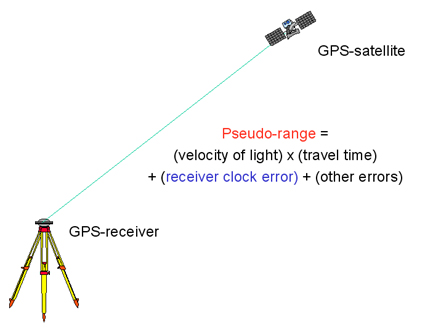

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [40]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos =  df_sat_pos.to_numpy()

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = #...
m = #...

In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = #...

In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = #...

In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = #...
i = #...
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  #...
  return distance


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
  #...
  return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)


while (#convergence criteria):

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = #...

       # compute the design matrix A
       # (1 marks)
       A = #...

       # compute the misclosure array w
       # (1 marks)
       w = #...

       # compute the corrections delta
       # (1 marks)
       delta = #...

       # update the states
       # (1 marks)
       x_hat = #...


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = #...


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)


       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w #...
       arr_delta #...
       arr_err_pos #...
       arr_i #...




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)
apv = #...

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = #...




In [ ]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)



In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)


# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)


# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
